In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn import model_selection

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
titanic_data_path = './titanic-data/'
titanic_train = pd.read_csv(titanic_data_path + 'train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Summarizing the data
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Columns in this data frame
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Checking for null values
titanic_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
# Datatypes of the objects
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanic_train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [8]:
# Looking at the entries in the Sex column, since it isn't an integer
titanic_train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [9]:
# Transforming the text based entries ('male', 'female') into numeric values
sexCheck = lambda s: 1 if s == 'male' else 0
titanic_train['Sex'] = titanic_train['Sex'].apply(sexCheck)
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [10]:
# Since Age has missing values, time to fill those in
# Consider using median (to avoid extreme value effects) or mode here
mean_age = titanic_train['Age'].mean()
titanic_train.fillna(mean_age, inplace=True)
titanic_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


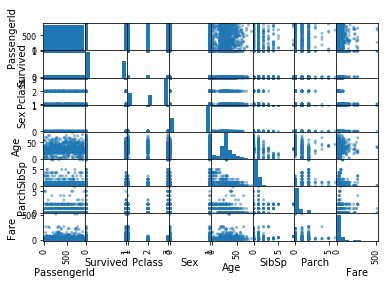

In [11]:
# Visualizing the data using plots
# %matplotlib inline
scatter_matrix(titanic_train)
plt.show()

In [24]:
# Feature selection
# Note that we won't use passengerId as a feature as (presumably) it has no impact on survival
# EDIT: This configuration achieved 81% accuracy using the DTC, the highest so far
# Performed very poorly using SVC and KNC (60-70%)
titanic_features = ['Pclass', 'Sex', 'Age', 'Fare']

# Target value to predict
titanic_target = ['Survived']

X = titanic_train[titanic_features]
Y = titanic_train[titanic_target]

# Dividing the data into training and validation groups
# Size of the validation group
validation_size = 0.001
# Seed for random state
seed = 7
# Splitting the data using sklearn model_selection
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [28]:
# Time to get this party started! :D
models = {
    'lr': LogisticRegression(),
    'svc': SVC(),
    'dtc': DecisionTreeClassifier(),
    'knc': KNeighborsClassifier(),
    'rfc': RandomForestClassifier()
}

# Storing the accuracy scores of the various models in a dictionary
accuracy_scores = {}

# Fitting the data using each of the models, and calculating their accuracy scores
for model in models:
    models[model].fit(X_train, Y_train)
    predictions = models[model].predict(X_val)
    score = accuracy_score(Y_val, predictions)
    accuracy_scores[model] = score
    
accuracy_scores

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


{'dtc': 1.0, 'knc': 1.0, 'lr': 1.0, 'rfc': 1.0, 'svc': 1.0}

In [29]:
# Time to generate predictions for the test data we have using DTC
titanic_test = pd.read_csv(titanic_data_path + 'test.csv')

# Preprocessing the Sex column
# Transforming the text based entries ('male', 'female') into numeric values
sexCheck = lambda s: 1 if s == 'male' else 0
titanic_test['Sex'] = titanic_test['Sex'].apply(sexCheck)

# Imputing missing age values
mean_test_age = titanic_test['Age'].mean()
titanic_test.fillna(mean_test_age, inplace=True)

# Feature selection
X_test = titanic_test[titanic_features]

test_predictions = models['rfc'].predict(X_test)

In [30]:
# Consolidating the test data predictions with the passanger ID (Kaggle submission format)
print(test_predictions)

# TODO: Find a better way to do this :p
titanic_test['Survived'] = test_predictions

results = titanic_test[['PassengerId', 'Survived']]

# Save results of the computation to a CSV file
results.to_csv('./test-results/results.csv', index=False)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0]
